In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_excel('C:/Users/Akshay-Laptop/Desktop/practice/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Data_Train.xlsx')
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
data.shape

(10683, 11)

In [4]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [5]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
data.dropna(inplace=True)

In [7]:
data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [8]:
data.Airline=data.Airline.map({'Jet Airways':'Jet Airways','IndiGo':'IndiGo','Air India':'Air India','Multiple carriers':'Multiple carriers',
                              'SpiceJet':'SpiceJet','Vistara':'Vistara','Air Asia':'Air Asia','Air Asia':'other','GoAir':'other',
                              'Multiple carriers Premium economy':'other','Jet Airways Business':'other','Vistara Premium economy':'other',
                              'Trujet':'other'})

In [9]:
data.Airline.value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1751
Multiple carriers    1196
SpiceJet              818
other                 536
Vistara               479
Name: Airline, dtype: int64

In [10]:
data.Date_of_Journey=pd.to_datetime(data.Date_of_Journey,format='%d/%m/%Y')

In [11]:
data.Date_of_Journey.head()

0   2019-03-24
1   2019-05-01
2   2019-06-09
3   2019-05-12
4   2019-03-01
Name: Date_of_Journey, dtype: datetime64[ns]

In [12]:
weekday=data.Date_of_Journey.dt.weekday
weekday

0        6
1        2
2        6
3        6
4        4
5        0
6        1
7        4
8        1
9        0
10       5
11       3
12       0
13       3
14       2
15       6
16       0
17       2
18       2
19       0
20       2
21       3
22       2
23       2
24       0
25       6
26       5
27       2
28       1
29       5
        ..
10653    2
10654    2
10655    4
10656    5
10657    0
10658    1
10659    2
10660    3
10661    3
10662    6
10663    3
10664    1
10665    5
10666    2
10667    1
10668    3
10669    5
10670    6
10671    3
10672    3
10673    0
10674    1
10675    6
10676    2
10677    1
10678    1
10679    5
10680    5
10681    4
10682    3
Name: Date_of_Journey, Length: 10682, dtype: int64

In [13]:
month=data.Date_of_Journey.dt.month
month

0        3
1        5
2        6
3        5
4        3
5        6
6        3
7        3
8        3
9        5
10       6
11       4
12       6
13       5
14       4
15       3
16       4
17       6
18       6
19       5
20       3
21       3
22       4
23       5
24       5
25       6
26       6
27       5
28       6
29       6
        ..
10653    5
10654    6
10655    5
10656    4
10657    5
10658    6
10659    5
10660    3
10661    5
10662    3
10663    6
10664    4
10665    4
10666    6
10667    3
10668    5
10669    6
10670    5
10671    6
10672    6
10673    5
10674    3
10675    6
10676    5
10677    5
10678    4
10679    4
10680    4
10681    3
10682    5
Name: Date_of_Journey, Length: 10682, dtype: int64

In [14]:
data.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [15]:
data.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [16]:
data.Route.value_counts()

DEL → BOM → COK                      2376
BLR → DEL                            1552
CCU → BOM → BLR                       979
CCU → BLR                             724
BOM → HYD                             621
CCU → DEL → BLR                       565
BLR → BOM → DEL                       402
MAA → CCU                             381
DEL → HYD → COK                       326
DEL → JAI → BOM → COK                 240
DEL → BLR → COK                       232
DEL → COK                             213
DEL → AMD → BOM → COK                 205
DEL → MAA → COK                       146
DEL → IDR → BOM → COK                  99
DEL → HYD → MAA → COK                  83
DEL → NAG → BOM → COK                  71
CCU → MAA → BLR                        65
DEL → GOI → BOM → COK                  58
DEL → HYD → BOM → COK                  56
CCU → HYD → BLR                        53
CCU → BBI → BLR                        50
DEL → BHO → BOM → COK                  50
CCU → IXR → DEL → BLR             

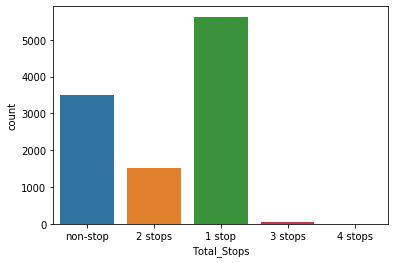

In [17]:
sns.countplot(data['Total_Stops'])

In [18]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [19]:
data=data[data['Total_Stops']!='4 stops']

In [20]:
data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
Name: Total_Stops, dtype: int64

In [21]:
data['Total_Stops']=data['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3})

In [22]:
data['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
Name: Total_Stops, dtype: int64

In [23]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    6
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [24]:
data=data[(data['Additional_Info']!='1 Long layover')&(data['Additional_Info']!='Change airports')&(data['Additional_Info']!='Business class')&(data['Additional_Info']!='No Info')&(data['Additional_Info']!='Red-eye flight')&(data['Additional_Info']!='2 Long layover')&(data['Additional_Info']!='1 Short layover')]

In [25]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
Name: Additional_Info, dtype: int64

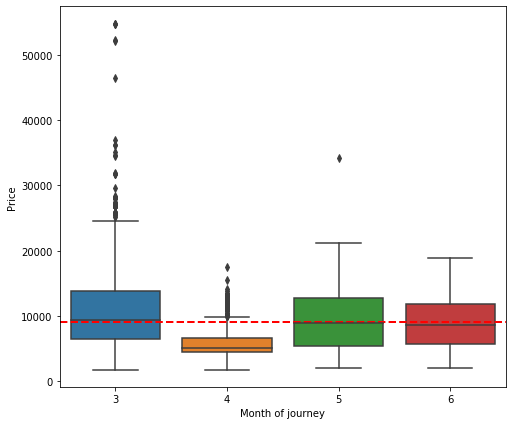

In [26]:
plt.figure(figsize=(8,7))
sns.boxplot(month,data['Price'])
plt.xlabel('Month of journey')
plt.axhline(data['Price'].mean(),color='r',linestyle='dashed',linewidth=2)

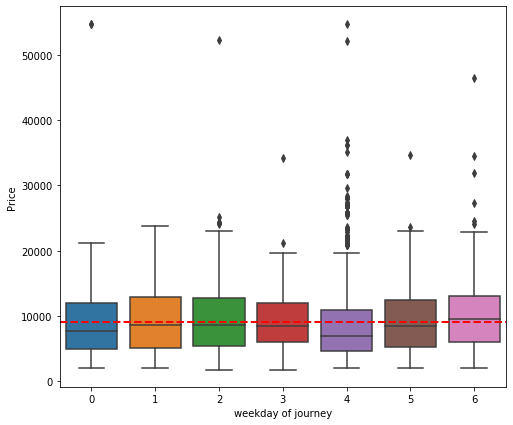

In [27]:
plt.figure(figsize=(8,7))
sns.boxplot(weekday,data['Price'])
plt.xlabel('weekday of journey')
plt.axhline(data['Price'].mean(),color='r',linestyle='dashed',linewidth=2)

In [28]:
data['weekday']=weekday
data['month']=month

In [29]:
data.weekday=data.weekday.map({0:0,1:1,2:1,3:1,5:1,6:1,4:2})

In [30]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,1,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1,6
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,1,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,2,3


In [31]:
data.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

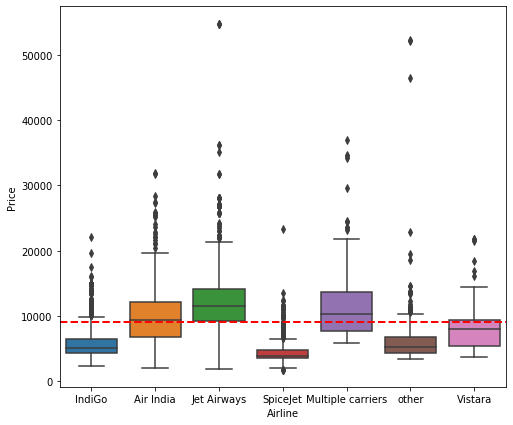

In [32]:
plt.figure(figsize=(8,7))
sns.boxplot(data.Airline,data['Price'])
plt.axhline(data['Price'].mean(),color='r',linestyle='dashed',linewidth=2)

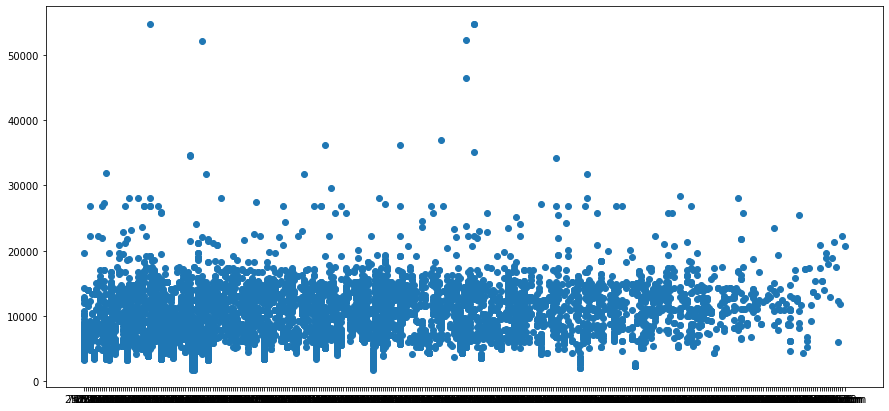

In [33]:
plt.figure(figsize=(15,7))
plt.scatter(data.Duration,y=data.Price)

In [34]:
data.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     336
2h 35m     329
3h         261
2h 20m     238
2h 30m     220
2h 40m     158
2h 15m     135
1h 25m     135
2h 25m      98
13h 30m     97
13h 20m     89
3h 15m      88
7h 30m      86
9h 30m      85
8h 40m      81
7h 15m      78
3h 5m       78
5h 30m      72
7h 35m      71
8h          68
7h 5m       65
9h          64
9h 50m      64
5h          63
11h 45m     62
5h 15m      62
1h 20m      61
          ... 
20h 50m      2
27h 55m      1
5m           1
41h 20m      1
31h 30m      1
30h 25m      1
33h 45m      1
31h 50m      1
30h 15m      1
35h 20m      1
3h 25m       1
37h 10m      1
4h 10m       1
36h 25m      1
27h 30m      1
19h 50m      1
30h 10m      1
35h 35m      1
40h 20m      1
29h 40m      1
29h 10m      1
42h 45m      1
32h 55m      1
13h 35m      1
47h 40m      1
47h          1
32h 20m      1
33h 20m      1
28h 30m      1
42h 5m       1
Name: Duration, Length: 367, dtype: int64

In [35]:
data_test=pd.read_excel('C:/Users/Akshay-Laptop/Desktop/practice/Flight_Ticket_Participant_Datasets-20190305T100527Z-001/Flight_Ticket_Participant_Datasets/Test_set.xlsx')
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [36]:
data_test.Airline=data_test.Airline.map({'Jet Airways':'Jet Airways','IndiGo':'IndiGo','Air India':'Air India','Multiple carriers':'Multiple carriers',
                              'SpiceJet':'SpiceJet','Vistara':'Vistara','Air Asia':'Air Asia','Air Asia':'other','GoAir':'other',
                              'Multiple carriers Premium economy':'other','Jet Airways Business':'other','Vistara Premium economy':'other',
                              'Trujet':'other'})

In [37]:
data_test.Date_of_Journey=pd.to_datetime(data_test.Date_of_Journey,format='%d/%m/%Y')

In [38]:
weekday=data_test.Date_of_Journey.dt.weekday
weekday

0       3
1       6
2       1
3       1
4       0
5       2
6       1
7       2
8       4
9       5
10      3
11      5
12      2
13      1
14      0
15      2
16      3
17      6
18      2
19      1
20      2
21      3
22      0
23      3
24      5
25      3
26      2
27      1
28      3
29      5
       ..
2641    3
2642    1
2643    3
2644    0
2645    1
2646    5
2647    2
2648    0
2649    0
2650    3
2651    3
2652    1
2653    5
2654    6
2655    0
2656    6
2657    3
2658    5
2659    5
2660    1
2661    2
2662    1
2663    6
2664    5
2665    4
2666    3
2667    2
2668    2
2669    2
2670    5
Name: Date_of_Journey, Length: 2671, dtype: int64

In [39]:
month=data_test.Date_of_Journey.dt.weekday
month

0       3
1       6
2       1
3       1
4       0
5       2
6       1
7       2
8       4
9       5
10      3
11      5
12      2
13      1
14      0
15      2
16      3
17      6
18      2
19      1
20      2
21      3
22      0
23      3
24      5
25      3
26      2
27      1
28      3
29      5
       ..
2641    3
2642    1
2643    3
2644    0
2645    1
2646    5
2647    2
2648    0
2649    0
2650    3
2651    3
2652    1
2653    5
2654    6
2655    0
2656    6
2657    3
2658    5
2659    5
2660    1
2661    2
2662    1
2663    6
2664    5
2665    4
2666    3
2667    2
2668    2
2669    2
2670    5
Name: Date_of_Journey, Length: 2671, dtype: int64

In [40]:
data_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [41]:
data_test=data_test[data_test['Total_Stops']!='4 stops']

In [42]:
data_test['Total_Stops']=data_test['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3})

In [43]:
data_test=data_test[(data_test['Additional_Info']!='1 Long layover')&(data_test['Additional_Info']!='Change airports')&(data_test['Additional_Info']!='Business class')&(data_test['Additional_Info']!='No Info')&(data_test['Additional_Info']!='Red-eye flight')&(data_test['Additional_Info']!='2 Long layover')&(data_test['Additional_Info']!='1 Short layover')]

In [44]:
data_test['weekday']=weekday
data_test['month']=month

In [45]:
data_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,weekday,month
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,3,3
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,6,6
2,Jet Airways,2019-05-21,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,1,1
3,Multiple carriers,2019-05-21,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,1,1
4,other,2019-06-24,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,0,0


In [46]:
data_test.drop(['Date_of_Journey','Dep_Time','Arrival_Time'],axis=1,inplace=True)

In [47]:
data_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,weekday,month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,3,3
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,6,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,1,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,1,1
4,other,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,0,0


In [48]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,weekday,month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,1,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,1,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,1,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,2,3


In [49]:
data_test.weekday=data_test.weekday.map({0:0,1:1,2:1,3:1,5:1,6:1,4:2})

In [50]:
data_1=data.drop(['Route','Duration'],axis=1)

In [51]:
data_1=pd.get_dummies(data_1,drop_first=True)

In [52]:
data_in=data_1.drop(['Price'],axis=1)

In [53]:
data_op=data_1.Price

In [54]:
data_test.shape,data_in.shape

((2667, 9), (10646, 20))

In [55]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import KFold

In [56]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.model_selection import train_test_split as tts

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
lr=LinearRegression()
max_score=0
for i in range(0,100):
    x_train,x_test,y_train,y_test=tts(data_in,data_op,random_state=i,test_size=0.20)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    rscore=r2_score(y_test,y_pred)
    print('at random state {} r2score is:{}'.format(i,rscore))
    if rscore>max_score:
            max_score=rscore
            final_state=i
print('Max_score is :',max_score,'at',final_state)

at random state 0 r2score is:0.6046439956045017
at random state 1 r2score is:0.6259801959111477
at random state 2 r2score is:0.6716608408224081
at random state 3 r2score is:0.6360185863892234
at random state 4 r2score is:0.6138346294156247
at random state 5 r2score is:0.6451416070993162
at random state 6 r2score is:0.6324293718853597
at random state 7 r2score is:0.6308171184195311
at random state 8 r2score is:0.5980769849833463
at random state 9 r2score is:0.6483884280166636
at random state 10 r2score is:0.6464884755736848
at random state 11 r2score is:0.6578178652850967
at random state 12 r2score is:0.6077410056399737
at random state 13 r2score is:0.6475623806653215
at random state 14 r2score is:0.6244587178554772
at random state 15 r2score is:0.577393885789554
at random state 16 r2score is:0.6211801513705777
at random state 17 r2score is:0.6021597139942907
at random state 18 r2score is:0.628427956806134
at random state 19 r2score is:0.6372970291027003
at random state 20 r2score is:0.

In [58]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=40)
RFR.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=40, verbose=0,
                      warm_start=False)

In [61]:
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,100),'max_depth':range(2,10)}]
grid_search=GridSearchCV(estimator=RFR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)

In [62]:
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'max_depth': 9, 'random_state': 64}


0.7661440979699892

In [63]:
from sklearn.ensemble import RandomForestRegressor as RFR
RFR=RFR(random_state=64,max_depth=9)
RFR.fit(x_train,y_train)
y_pred=RFR.predict(x_test)
train_pred=RFR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(RFR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.7379299677889637
rscore for training data: 0.789378815393302
Cross val score: [0.74720534 0.70116212 0.77584675 0.79414925 0.81421662 0.79469629
 0.68477263 0.73454176 0.77299047 0.67188687]
Mean cv: 0.7491468092031126


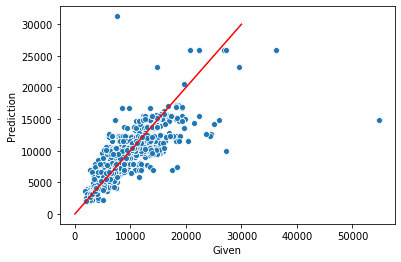

In [68]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,30000,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 1333.0112803615839
Mean absolute error of train data: 1235.1047990567479
Mean squared error of test data: 2253.5752090346587
Mean squared error of train data: 2049.3911741468123


In [72]:
from sklearn.ensemble import AdaBoostRegressor as ABR
ABR=ABR(base_estimator=RFR)
ABR.fit(x_train,y_train)
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,50),'loss':['linear', 'square'],'learning_rate':[0.3]}]
kf = KFold(shuffle=True, n_splits=10)
grid_search=GridSearchCV(estimator=ABR,param_grid=parameters,scoring='r2',cv=kf,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'learning_rate': 0.3, 'loss': 'linear', 'random_state': 7}


0.6949218082602469

In [76]:
from sklearn.ensemble import AdaBoostRegressor as ABR
ABR=ABR(base_estimator=RFR,learning_rate=0.1,loss='linear',random_state=7)
ABR.fit(x_train,y_train)
y_pred=ABR.predict(x_test)
train_pred=ABR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(ABR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.6880288390821605
rscore for training data: 0.7326425510127681
Cross val score: [0.68946812 0.67309937 0.73996694 0.67749102 0.62978622 0.60736639
 0.73643173 0.6846394  0.6998769  0.73601716]
Mean cv: 0.6874143222237319


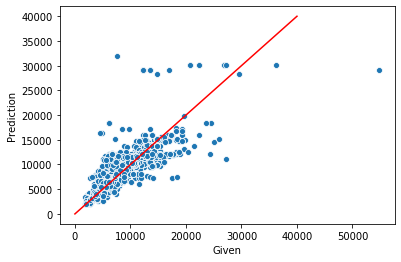

In [77]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,40000,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 1445.5273403327292
Mean absolute error of train data: 1350.3069781447703
Mean squared error of test data: 2458.785254311958
Mean squared error of train data: 2308.9789857599403


In [79]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=5,leaf_size=30)
KNR.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [80]:
from sklearn.model_selection import GridSearchCV
parameters=[{'n_neighbors':range(3,20),'weights':['uniform','distance'],'leaf_size':[30,50,100]}]
grid_search=GridSearchCV(estimator=KNR,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'leaf_size': 30, 'n_neighbors': 19, 'weights': 'distance'}


0.7554048984901075

In [81]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor(n_neighbors=19,leaf_size=30,weights='distance')
KNR.fit(x_train,y_train)
y_pred=KNR.predict(x_test)
train_pred=KNR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(KNR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))


rscore for testing data: 0.719931828447819
rscore for training data: 0.7874564670624216
Cross val score: [0.74906322 0.78780319 0.74922038 0.75502754 0.7042098  0.80509153
 0.77086963 0.7326819  0.76983264 0.7218082 ]
Mean cv: 0.7545608033001285


In [58]:
from sklearn.ensemble import GradientBoostingRegressor as GBR
GBR=GBR(alpha=0.1)

In [59]:
GBR.fit(x_train,y_train)
y_pred=GBR.predict(x_test)
train_pred=GBR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(GBR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.7281838393374375
rscore for training data: 0.7508146668457353
Cross val score: [0.75661572 0.73246993 0.70431924 0.760452   0.72524672 0.76620278
 0.77386126 0.76866814 0.70490443 0.74249698]
Mean cv: 0.7435237183877358


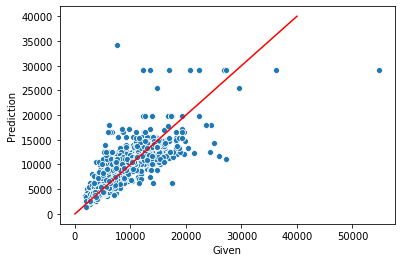

In [62]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,40000,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [63]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 1666.8545042341802
Mean absolute error of train data: 1610.8443324223667
Mean squared error of test data: 2617.685376769034
Mean squared error of train data: 2541.000303885974


In [64]:
from sklearn.tree import DecisionTreeRegressor as DTC
DTC=DTC()
DTC.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [66]:
from sklearn.model_selection import GridSearchCV
parameters=[{'random_state':range(0,100),'max_depth':range(2,11)}]
grid_search=GridSearchCV(estimator=DTC,param_grid=parameters,scoring='r2',cv=10,n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)
print(grid_search.best_params_)
score=grid_search.best_score_
score

{'max_depth': 10, 'random_state': 1}


0.7478100263717641

In [67]:
from sklearn.tree import DecisionTreeRegressor as DTR
DTR=DTR(max_depth=10,random_state=1)
DTR.fit(x_train,y_train)
y_pred=DTR.predict(x_test)
train_pred=DTR.predict(x_train)
rscore=r2_score(y_test,y_pred)
rscore1=r2_score(y_train,train_pred)
kf = KFold(shuffle=True, n_splits=10)
cv=cvs(DTR,data_in,data_op,cv=kf,scoring='r2')
print('rscore for testing data:',rscore)
print('rscore for training data:',rscore1)
print('Cross val score:',cv)
print('Mean cv:',np.mean(cv))

rscore for testing data: 0.7370412131674897
rscore for training data: 0.7939775431624673
Cross val score: [0.75362549 0.80838597 0.79102843 0.67142196 0.76559381 0.73421227
 0.74706172 0.79451482 0.72750651 0.74981274]
Mean cv: 0.7543163706248199


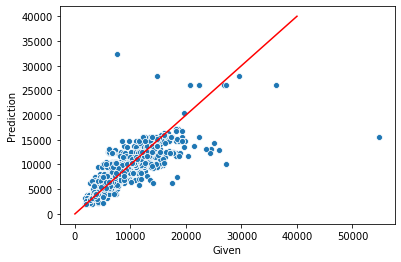

In [68]:
plot_k = sns.scatterplot(y_test, y_pred)
plot_k.set(xlabel='Given', ylabel='Prediction')
x_plot = np.linspace(0,40000,10)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

In [69]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('error:')
print('Mean absolute error of test data:',mean_absolute_error(y_test,y_pred))
print('Mean absolute error of train data:',mean_absolute_error(y_train,train_pred))
print('Mean squared error of test data:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Mean squared error of train data:',np.sqrt(mean_squared_error(y_train,train_pred)))

error:
Mean absolute error of test data: 1322.194976835794
Mean absolute error of train data: 1213.2057587264821
Mean squared error of test data: 2257.3932346155743
Mean squared error of train data: 2026.8943727479477


In [70]:
data_test.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,weekday,month
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,10h 55m,1,No info,1,3
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,4h,1,No info,1,6
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,23h 45m,1,In-flight meal not included,1,1
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,13h,1,No info,1,1
4,other,Banglore,Delhi,BLR → DEL,2h 50m,0,No info,0,0


In [71]:
data_test.drop(['Route','Duration'],axis=1,inplace=True)

In [72]:
data_2=pd.get_dummies(data_test,drop_first=True)

In [73]:
data_2.shape

(2667, 20)

In [74]:
Price=pd.DataFrame({'Actual price':y_test,'Predicted price':y_pred})
Price

,Actual price,Predicted price
10601,15147,12376.065217
5336,13376,13481.458333
10037,9663,9950.826667
3620,13292,13481.458333
8539,8073,10114.010152
3043,14848,10114.010152
2832,4145,5860.186441
338,5201,5860.186441
8203,3419,4405.895270
3412,3625,3952.242857


In [81]:
test_pred=DTR.predict(data_2)
test_pred=pd.DataFrame(test_pred,columns=['Predicted test'])

In [82]:
test_pred

,Predicted test
0,14735.774834
1,6322.500000
2,9623.625000
3,12376.065217
4,4289.046875
5,9623.625000
6,9466.066667
7,9406.746753
8,4733.428571
9,13713.307692


In [83]:
test_pred.to_csv('project17_predictions.csv')

In [84]:
from sklearn.externals import joblib

In [85]:
joblib.dump(DTR,'project17_DTC.pkl')

['project17_DTC.pkl']